# Aula 04 - Boosting

Hoje daremos continuidade aos algoritmos ensemble olhando para os que utilizam a técnica de boosting. A aula será dividia nos seguintes tópicos:

### - Primeira parte

- Liberação do projeto
- Introdução e contextualização
- A ideia do boosting

### - Segunda parte

- Funcionamento do Adaboost
- O (atual) rei dos modelos: lightgbm

### - Terceira parte

- Exercício

# Introdução e contextualização

-------------

# Relembrando...

## Trade-off viés-variância

Um dilema que todo cientista de dados precisa enfrentar durante a construção de um modelo é o que ocorre é o entre o viés é a variância. Há um comportamento natural, que pode ser observado na figura abaixo:  


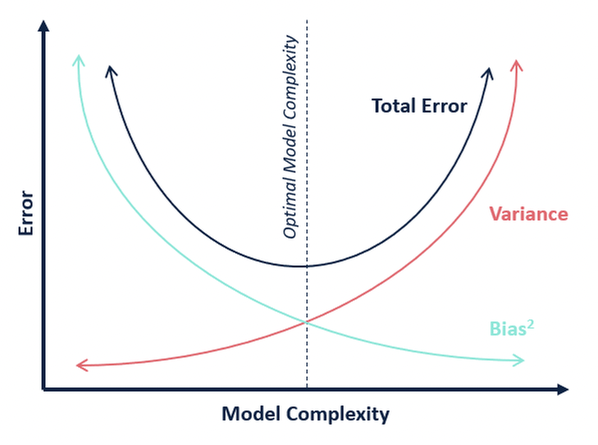  

Podemos interpretar as regiões à direita do ponto ótimo como regiões de **overfitting**, e regiões à esquerda, como **underfitting**.  

A função do cientista é calibrar o modelo através dos hiperparâmetros de maneira que o desempenho seja o melhor possível, ou seja, um ponto ótimo entre viés e variância. Cada modelo possúi característica diferentes, que fazem com que ele possua um viés mais alto ou uma variância mais alta. Como vimos nas aulas passadas, a **árvore de decisão** é um algoritmo com muita variância.  

À medida que a modelagem científica avançou, novas propostas de modelos surgiram (e continuam a surgir) para tentar contornar tendências que os algoritmos possuem naturalmente. Uma abordagem muito popular é a estratégia de **ensemble**.

## Métodos de Ensemble


Um conceito intuitivo e muito popular em Machine Learning são os chamados **métodos de ensemble**, que tem como objetivo **combinar as predições de diversos estimadores** para gerar uma **predição final mais robusta**.

Os métodos de ensemble são ainda divididos em duas classes:

- **Métodos de Bagging**: têm como procedimento geral construir diversos estimadores independentes, e tomar a média de suas predições como a predição final. O principal objetivo do método é reduzir variância, de modo que o modelo final seja melhor que todos os modelos individuais. Ex.: **random forest.**


- **Métodos de Boosting**: têm como procedimento geral a construção de estimadores de forma sequencial, de modo que estimadores posteriores tentam reduzir o viés do estimador conjunto, que leva em consideração estimadores anteriores. Ex.: **adaboost**.

Para mais detalhes, [clique aqui!](https://scikit-learn.org/stable/modules/ensemble.html)

# O AdaBoost

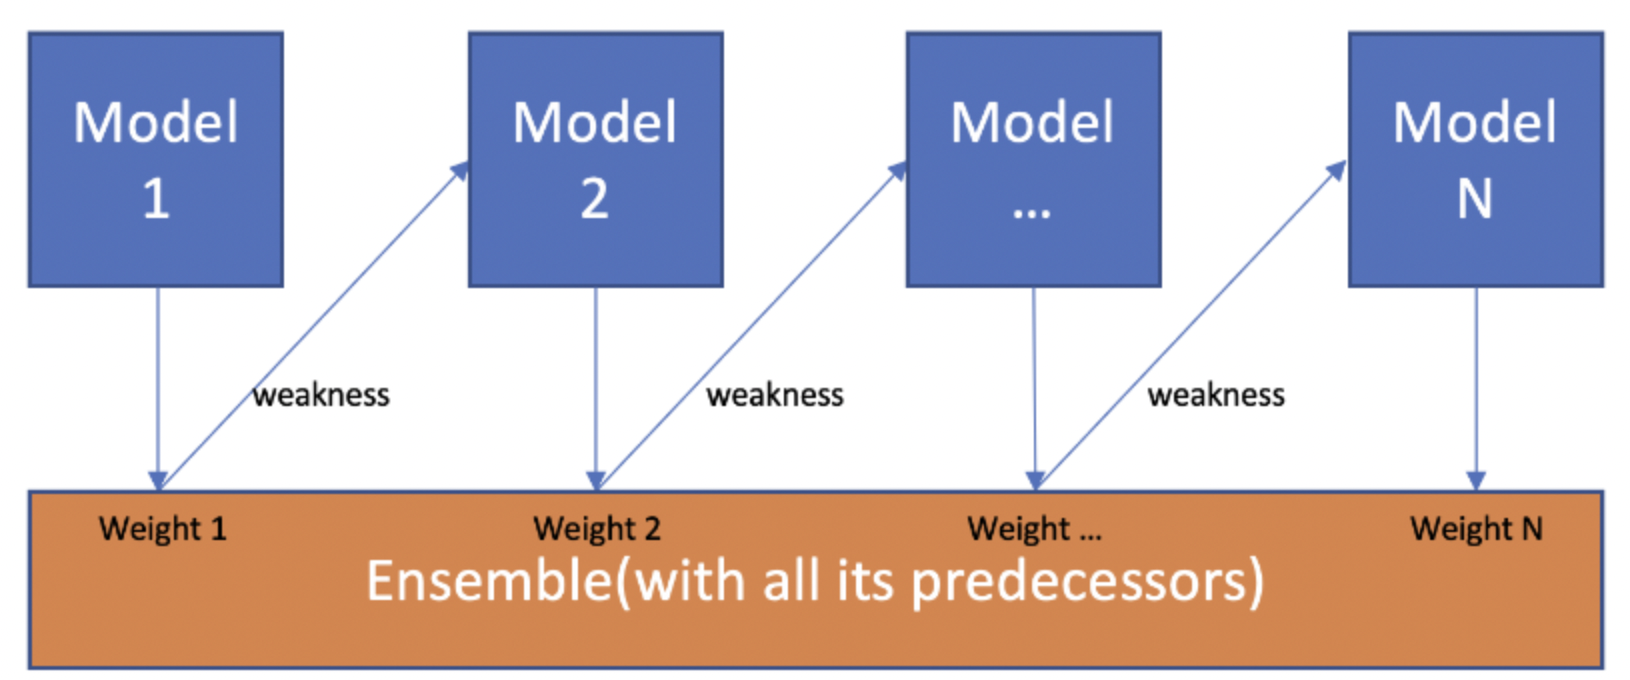

O peso de uma das árvores é definido por:

$$ peso = \frac{1}{2}*log(\frac{1-erro}{erro}) $$

Onde o erro é a soma dos pesos dos exemplos em que o modelo errou

A atualização dos pesos é:

Erros:

$$ novo\_peso = peso\_antigo*exp(peso\_modelo) $$

Acertos:

$$ novo\_peso = peso\_antigo*exp(-peso\_modelo) $$


**Treino:**  

    1 - Define o dataset de treino como a base de treino original, com os pesos dos exemplos sendo 1/n, onde n é o número de exemplos;

Para cada instância:

    2 - Treina a árvore com o dataset de treino atual;

    3 - Define um peso diretamente proporcional ao desempenho para a árvore treinada;

    4 - Calibra os pesos de cada amostra proporcionalmente ao peso do modelo, aumentando o peso das amostras com erro e diminuindo as corretamente classificadas;

    5 - Cria um novo dataset de treino a partir da amostragem com reposição calibrada pelos pesos das amostras;

**Inferência:**  

    1 - Percorre os dados em cada árvore, gerando uma predição para cada instância;

    2 - Toma como predição final a moda do conjunto de predições ponderada pelo peso de cada árvore.

## Testando o conceito

In [184]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
import numpy as np

In [185]:
df_cancer_train = pd.read_csv('breast_cancer_train.csv')
df_cancer_test = pd.read_csv('breast_cancer_test.csv')

df_cancer_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
1,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,88330202,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
3,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
4,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [186]:
df_cancer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   diagnosis                455 non-null    object 
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

In [187]:
df_cancer_train['diagnosis'] = df_cancer_train['diagnosis'].map({'M': 1, 'B': 0})

df_cancer_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,0,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
1,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,88330202,1,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
3,88203002,0,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
4,892189,1,11.76,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [188]:
X = df_cancer_train.drop(['id', 'diagnosis'], axis=1)
y = df_cancer_train['diagnosis']

print(X.shape, y.shape)

(455, 30) (455,)


In [189]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(318, 30) (318,)
(137, 30) (137,)


### Treino

-------

In [255]:
arvores = []
pesos_arvores = []

In [256]:
pesos_exemplos = np.array([1/len(X_train) for _ in range(len(X_train))])

1 - Define o dataset de treino como a base de treino original, com os pesos dos exemplos sendo 1/n, onde n é o número de exemplos;

In [288]:
X_boosting = X_train.sample(frac=1.0, replace=True, weights=pesos_exemplos)

X_boosting.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
421,11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,...,12.08,33.75,79.82,452.3,0.09203,0.1432,0.1089,0.02083,0.2849,0.07087
381,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.112100,0.1848,0.06222,...,23.86,30.76,163.20,1760.0,0.14640,0.3597,0.5179,0.21130,0.2480,0.08999
49,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.160400,0.2906,0.08142,...,23.37,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964
331,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.159500,0.1648,0.05525,...,28.11,18.47,188.50,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525
49,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.160400,0.2906,0.08142,...,23.37,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964


In [289]:
y_boosting = y_train[X_boosting.index]

2 - Treina a árvore com o dataset de treino atual;

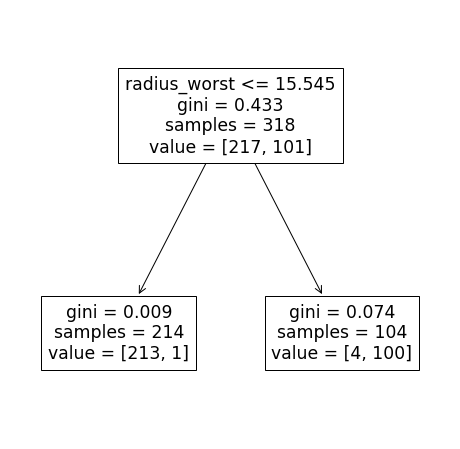

In [290]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

arvore = DecisionTreeClassifier(max_depth=1)

arvore.fit(X_boosting, y_boosting)

plt.figure(figsize=(8, 8))
plot_tree(arvore, feature_names=X_boosting.columns)
plt.show()

3 - Define um peso diretamente proporcional ao desempenho para a árvore treinada;

$$ peso = \frac{1}{2}*log(\frac{1-erro}{erro}) $$

In [291]:
y_pred = arvore.predict(X_train)

In [292]:
erro_arvore = pesos_exemplos[(y_train != y_pred)].sum() + 1e-10

In [293]:
peso_arvore = 0.5 * np.log((1-erro_arvore)/erro_arvore)

peso_arvore

1.9696141855509843

In [294]:
arvores.append(arvore)
pesos_arvores.append(peso_arvore)

4 - Calibra os pesos de cada amostra proporcionalmente ao peso do modelo, aumentando o peso das amostras com erro e diminuindo as corretamente classificadas;

Erros:

$$ novo\_peso = peso\_antigo*exp(peso\_modelo) $$

Acertos:

$$ novo\_peso = peso\_antigo*exp(-peso\_modelo) $$

In [295]:
pesos_exemplos[(y_boosting != y_boosting_pred)] *= np.exp(peso_arvore)

pesos_exemplos[(y_boosting == y_boosting_pred)] *= np.exp(-peso_arvore)

In [296]:
pesos_exemplos = pesos_exemplos / pesos_exemplos.sum()

In [297]:
pesos_exemplos.sum()

1.0

### Inferência

-------

1 - Percorre os dados em cada árvore, gerando uma predição para cada instância;

2 - Toma como predição final a moda do conjunto de predições ponderada pelo peso de cada árvore

In [298]:
from scipy import stats
from sklearn.utils.extmath import weighted_mode

def predict(arvores, pesos_arvores, X):
    predictions = pd.DataFrame()

    for arvore in arvores:

        idx = arvores.index(arvore)
        
        y_predict = arvore.predict(X)

        predictions[f'Arvore {idx}'] = y_predict
        
    y_pred = predictions.apply(lambda row: weighted_mode(row, pesos_arvores)[0][0], axis=1)
    
    return y_pred

In [299]:
predict(arvores, pesos_arvores, X_train)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
313    0.0
314    0.0
315    0.0
316    1.0
317    1.0
Length: 318, dtype: float64

In [300]:
y_train_pred = predict(arvores, pesos_arvores, X_train)

y_valid_pred = predict(arvores, pesos_arvores, X_valid)

In [301]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.92, Precision: 0.97, Recall: 0.80
Validação:
Acc: 0.95, Precision: 0.98, Recall: 0.88


# Utilizando o AdaBoost do sklearn

In [306]:
base_treino = pd.read_csv('adult_train.csv')

base_treino.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,17,Private,144752,10th,6,Never-married,Handlers-cleaners,Own-child,Amer-Indian-Eskimo,Male,0,0,20,United-States,<=50K
1,21,Local-gov,402230,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Male,0,0,36,United-States,<=50K
2,41,Private,149576,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
3,29,Private,535978,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
4,54,Private,111469,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [307]:
base_treino.nunique()

age                   74
workclass              9
fnlwgt             24668
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         119
capital-loss          97
hours-per-week        95
native-country        42
income                 2
dtype: int64

In [308]:
base_treino['income'] = base_treino['income'].map({'<=50K': 0, '>50K': 1})

In [309]:
categ_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
num_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [310]:
X = base_treino[categ_features + num_features]
y = base_treino['income']

print(X.shape, y.shape)

(39074, 12) (39074,)


In [311]:
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(27351, 12) (27351,)
(11723, 12) (11723,)


In [312]:
from sklearn.preprocessing import OrdinalEncoder
pd.options.mode.chained_assignment = None

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

oe.fit(X_train[categ_features])

X_train[categ_features] = oe.transform(X_train[categ_features])

X_valid[categ_features] = oe.transform(X_valid[categ_features])

X_train.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
31768,4.0,0.0,8.0,1.0,4.0,0.0,38.0,31,10,0,0,15
32904,7.0,4.0,4.0,1.0,4.0,0.0,38.0,42,13,0,0,38
1855,4.0,2.0,8.0,5.0,2.0,0.0,38.0,47,9,0,0,30
34608,4.0,2.0,7.0,0.0,4.0,1.0,38.0,32,12,0,0,62
4609,5.0,2.0,10.0,0.0,4.0,1.0,38.0,56,15,99999,0,45


In [313]:
from sklearn.ensemble import AdaBoostClassifier

In [320]:
modelo = AdaBoostClassifier(n_estimators=20, random_state=12)

modelo

AdaBoostClassifier(n_estimators=20, random_state=12)

In [321]:
# Treino do modelo

modelo.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20, random_state=12)

In [322]:
y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(27351,) (11723,)


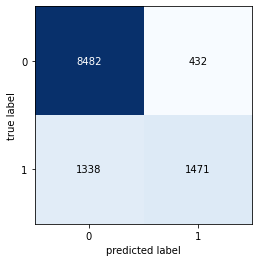

In [323]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [324]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.85, Precision: 0.77, Recall: 0.55
Validação:
Acc: 0.85, Precision: 0.77, Recall: 0.52


In [325]:
modelo.feature_importances_

array([0.  , 0.  , 0.05, 0.15, 0.  , 0.05, 0.  , 0.25, 0.2 , 0.15, 0.05,
       0.1 ])

# Utilizando o lightgbm

In [326]:
from lightgbm import LGBMClassifier

In [382]:
modelo = LGBMClassifier(n_estimators=50, max_depth=7, learning_rate=0.1, is_unbalance=True, importance_type='gain')

modelo

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50)

In [383]:
# Treino do modelo

modelo.fit(X_train, y_train)

LGBMClassifier(importance_type='gain', is_unbalance=True, max_depth=7,
               n_estimators=50)

In [384]:
y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(27351,) (11723,)


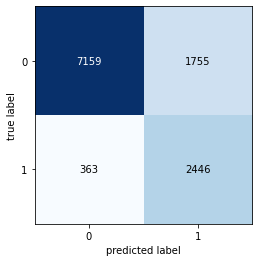

In [385]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [386]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.83, Precision: 0.60, Recall: 0.90
Validação:
Acc: 0.82, Precision: 0.58, Recall: 0.87


In [387]:
modelo.feature_importances_

array([ 1012.75093496, 49768.18276584,  5530.12448563, 18363.49756642,
         467.4582994 ,   869.46532393,   382.82526064, 13614.63681884,
       24070.652109  , 28144.11035142,  8015.00029206,  6889.2506001 ])

## GridSearch

In [351]:
from sklearn.model_selection import GridSearchCV

In [380]:
modelo = LGBMClassifier()

parameters = {
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [20, 50, 70, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'is_unbalance': [True, False]
}

clf = GridSearchCV(modelo, parameters, verbose=3, scoring='recall')

clf.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 3/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.0s
[CV 4/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=20; total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV 3/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV 4/5] END is_unbalance=True, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV 5/5] END is_unbalance=Tr

[CV 3/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=20; total time=   0.1s
[CV 4/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=20; total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=20; total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.2s
[CV 2/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.2s
[CV 3/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.2s
[CV 4/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.2s
[CV 5/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.2s
[CV 1/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=70; total time=   0.3s
[CV 2/5] END is_unbalance=True, learning_rate=0.01, max_depth=7, n_estimators=70; total tim

[CV 1/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.2s
[CV 2/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.1s
[CV 3/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.2s
[CV 4/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.2s
[CV 5/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=50; total time=   0.2s
[CV 1/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.2s
[CV 2/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.2s
[CV 3/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.2s
[CV 4/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.2s
[CV 5/5] END is_unbalance=True, learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.2s


[CV 5/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=50; total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=70; total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=70; total time=   0.2s
[CV 3/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=70; total time=   0.1s
[CV 4/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=70; total time=   0.2s
[CV 5/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=70; total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=150; total time=   0.3s
[CV 2/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=150; total time=   0.3s
[CV 3/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=150; total time=   0.3s
[CV 4/5] END is_unbalance=True, learning_rate=0.5, max_depth=5, n_estimators=150; total time=   0

[CV 4/5] END is_unbalance=True, learning_rate=1, max_depth=4, n_estimators=70; total time=   0.1s
[CV 5/5] END is_unbalance=True, learning_rate=1, max_depth=4, n_estimators=70; total time=   0.1s
[CV 1/5] END is_unbalance=True, learning_rate=1, max_depth=4, n_estimators=150; total time=   0.4s
[CV 2/5] END is_unbalance=True, learning_rate=1, max_depth=4, n_estimators=150; total time=   0.2s
[CV 3/5] END is_unbalance=True, learning_rate=1, max_depth=4, n_estimators=150; total time=   0.2s
[CV 4/5] END is_unbalance=True, learning_rate=1, max_depth=4, n_estimators=150; total time=   0.2s
[CV 5/5] END is_unbalance=True, learning_rate=1, max_depth=4, n_estimators=150; total time=   0.2s
[CV 1/5] END is_unbalance=True, learning_rate=1, max_depth=5, n_estimators=20; total time=   0.1s
[CV 2/5] END is_unbalance=True, learning_rate=1, max_depth=5, n_estimators=20; total time=   0.1s
[CV 3/5] END is_unbalance=True, learning_rate=1, max_depth=5, n_estimators=20; total time=   0.1s
[CV 4/5] END is

[CV 2/5] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV 3/5] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV 4/5] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV 5/5] END is_unbalance=False, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.2s
[CV 1/5] END is_unbalance=False, learning_rate=0.01, max_depth=4, n_estimators=20; total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=0.01, max_depth=4, n_estimators=20; total time=   0.0s
[CV 3/5] END is_unbalance=False, learning_rate=0.01, max_depth=4, n_estimators=20; total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=0.01, max_depth=4, n_estimators=20; total time=   0.0s
[CV 5/5] END is_unbalance=False, learning_rate=0.01, max_depth=4, n_estimators=20; total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.01, max_depth=4, n_estimators

[CV 3/5] END is_unbalance=False, learning_rate=0.01, max_depth=7, n_estimators=150; total time=   0.4s
[CV 4/5] END is_unbalance=False, learning_rate=0.01, max_depth=7, n_estimators=150; total time=   0.5s
[CV 5/5] END is_unbalance=False, learning_rate=0.01, max_depth=7, n_estimators=150; total time=   0.4s
[CV 1/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV 2/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV 3/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV 4/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.0s
[CV 5/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=20; total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=0.1, max_depth=3, n_estimators=50; tot

[CV 4/5] END is_unbalance=False, learning_rate=0.1, max_depth=6, n_estimators=150; total time=   0.3s
[CV 5/5] END is_unbalance=False, learning_rate=0.1, max_depth=6, n_estimators=150; total time=   0.3s
[CV 1/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=20; total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=20; total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=20; total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=20; total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=20; total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.2s
[CV 2/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=0.1, max_depth=7, n_estimators=50; total t

[CV 5/5] END is_unbalance=False, learning_rate=0.5, max_depth=5, n_estimators=150; total time=   0.4s
[CV 1/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20; total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20; total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20; total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20; total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=20; total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50; total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50; total time=   0.2s
[CV 3/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50; total time=   0.2s
[CV 4/5] END is_unbalance=False, learning_rate=0.5, max_depth=6, n_estimators=50; total ti

[CV 3/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=20; total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=20; total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=20; total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=50; total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=50; total time=   0.1s
[CV 3/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=50; total time=   0.1s
[CV 4/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=50; total time=   0.1s
[CV 5/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=50; total time=   0.1s
[CV 1/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=70; total time=   0.1s
[CV 2/5] END is_unbalance=False, learning_rate=1, max_depth=5, n_estimators=70; total time=   0.2s
[CV 3/5] E

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'is_unbalance': [True, False],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [20, 50, 70, 150]},
             scoring='recall', verbose=3)

In [392]:
modelo.predict_proba(X_valid)[:,1]

array([0.67567272, 0.14496775, 0.05909629, ..., 0.84776262, 0.74949967,
       0.04728572])

In [381]:
clf.best_params_

{'is_unbalance': True,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 50}

# Pra anotar

- Algoritmos de boosting são excelentes para se usar como primeiro modelo, pois exigem pouco pré-processamento;
- O lightgbm tem dominado as aplicações em dados estruturados;
- Boosting lida bem com dados desbalanceados;
- O treinamento não é totalmente paralelizável, o que pode gerar gargalos de desempenho.

-------

# Referências

An Introduction to Statistical Learning, 2013, Gareth James. Daniela Witten. Trevor Hastie. Robert Tibshirani.

[LightGBM - Overview - Microsoft](https://microsoft.github.io/SynapseML/docs/features/lightgbm/LightGBM%20-%20Overview/)